# Recitation (Extra exercises)


In [1]:
import numpy as np
import random
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
plt.style.use('bmh')

## use random experiment simulation to compute relative frequence.

# Problem 1 

Two dice are rolled. Consider three events.
A = ‘sum of two dice equals 3’,
B = ‘sum of two dice equals 7’,
C = ‘at least one of the dice shows a 1’

a. What is P(A|C)?

b. What is P(B|C)?


In [ ]:
num_sims=10
dice = npr.randint(1,7, size=(2, num_sims))
sum_dice = np.sum(dice, axis= 0) # axis=0: Sum along the columns (vertically).
countA = np.sum(sum_dice == 3) 
print('the count of event A is: ', countA)
print('the probability of event A is: ', countA/num_sims)


countB = np.sum(sum_dice == 7)
print('the count of event B is: ', countB)
print('the probability of event B is: ', countB/num_sims)

countC =np.sum(np.sum(dice==1, axis=0)>0)
print('the count of event C is: ', countC)
print('the probability of event C is: ', countC/num_sims)


 
eventC = np.sum(dice==1, axis=0)>0
print(eventC)

countAC = np.sum([sum_dice[k] == 3 and eventC[k]==1 for k in range(num_sims)])  
print('The probability of A given C is ', countAC/countC)

 

countBC = np.sum([sum_dice[k] == 7 and eventC[k]==1 for k in range(num_sims)])  
print('The probability of A given C is ', countBC/countC)


# Problem 3
An urn contains 30
 red balls and 70
 green balls.
 
 
 * What is the probability of getting exactly 5
 red balls in a sample of size 20
 if the sampling is done with replacement (repetition allowed)?
 
 * What is the probability of getting exactly 5
 red balls in a sample of size 20
 if the sampling is done without replacement (repetition not allowed)? 

In [38]:
urn1 = np.array(np.zeros([70,1]), dtype='bool')
urn2 = np.array(np.ones([30,1]), dtype ='bool')
urn = np.concatenate((urn1,urn2), axis=None)
count = 0
num_sims= 10000
for sim in range(num_sims):
    choose20 = npr.choice(urn,20,replace=True) # change replace=False for the second
    if np.sum(choose20==True)== 5:
        count += 1
print("the relative frequency of selecting 5 red with replacement is: ", count/num_sims)

the relative frequency of selecting 5 red with replacement is:  0.1804


# Problem 4
Assume that there are k
 people in a room and we know that:
 
k=5
 with probability $1/4$
;

k=10
 with probability $1/4$
;

k=15
 with probability $1/2$
.

What is the probability that at least two of them have been born in the same month? Assume that all months are equally likely.

In [36]:
num_sims = 10_000
count = 0
for sim in range(num_sims):
    selectk = npr.choice([5,10,15], p=[1/4, 1/4, 1/2])
    birthmonth = npr.choice(range(1,13), selectk)
    uniquemonth, counts = np.unique(birthmonth, return_counts = True)
    if np.sum(counts >=2) >0:
        count +=1
print('rel. freq', count/num_sims)

rel. freq 0.9027


In [31]:
selectk = npr.choice([5,10,15], p=[1/4, 1/4, 1/2])
birthmonth = npr.choice(range(1,13), selectk)


array([ 4,  1,  1,  5,  8, 12, 12,  8,  4,  8,  5,  1,  5,  4, 12])

In [35]:
uniquemonth, counts = np.unique(birthmonth, return_counts = True)
uniquemonth, counts
np.sum(counts >=2) >0

True


# Problem 4 [Null hypothesis testing and bootstrap sampling]

Consider two sets of coinflip experiments. the outcome 0 for tails and 1 for heads.

In [2]:
data1 =np.array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1])

In [3]:
data2 = np.array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]) 

Null hypothesis: These two data set are generated by the same coin (whose distribution is unknown. That is, the coin can be loaded.)

Perform Null hypothesis testing with significant level $\alpha =0.05$

In [7]:
avg1 = np.sum(data1)/len(data1)
avg2 = np.sum(data2)/len(data2)
diff = np.abs(avg1 - avg2)
diff

0.18

In [9]:
pooled = np.hstack((data1, data2))
pooled


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [10]:
num_sims = 10_000
count = 0
alpha = 0.05
pooled = np.hstack((data1, data2))
for sim in range(num_sims):
    data1sample = npr.choice(pooled, len(data1))
    data2sample = npr.choice(pooled, len(data2))
    avg_sample1 = np.sum(data1sample)/len(data1sample)
    avg_sample2 = np.sum(data2sample)/len(data2sample)
    diff_sample = np.abs(avg_sample1- avg_sample2)
    if diff_sample >= diff:
        count +=1
pval = count/num_sims
if pval > alpha:
    print('cannot reject the null hypothesis')
else:
    print('reject the null hypothesis')
print("the p-value is", pval)


reject the null hypothesis
the p-value is 0.034


<!-- revealed: the first is a fair coin, the second is generated with p(heads) = 0.7-->

# Problem 5 [Null hypothesis testing and pandas]


This dataset contains data of patients suffering from heart disease. The dataset is obtained from https://www.kaggle.com/ronitf/heart-disease-uci and is uploaded by the user ronit. Variables that can be found in this dataset includes age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar level, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, and ST depression induced by exercise relative to rest, slope of peak exercise ST segment, number of major vessels, Thallium injection, and presence of heart disease. In total, there are 14 different data in which six are ratio, and another eight are nominal type of data as shown in Data Description.

Dataset columns:

age: The person’s age in years

sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type

— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [11]:
# Read the data file 'heart.csv' as a dataframe object
df = pd.read_csv('heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# print out the columns of the dataframe


In [12]:
# obtain mean and median of blooed preseure the patient aged above 55
over55 = df.query('age > 55')
over55.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [13]:
over55mean = over55['trestbps'].mean()
over55median = over55['trestbps'].median()
print(over55mean, over55median)

136.23699421965318 134.0


Plot the age distribution of patients with heart disease

In [14]:
patients = df.query('target==1')
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


(array([ 4., 28., 79., 67., 90., 98., 52., 67., 35.,  6.]),
 array([29. , 33.7, 38.4, 43.1, 47.8, 52.5, 57.2, 61.9, 66.6, 71.3, 76. ]),
 <BarContainer object of 10 artists>)

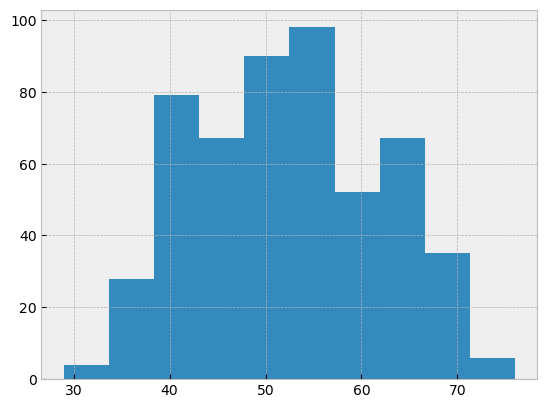

In [15]:
plt.hist(patients['age'])

The 'target' columns has entries 0, or 1 indicating if the person has heart disease or not
Plot two box plots on the same figure of the cholesterol levels 'chol'

In [16]:
healthy = df.query('target ==0')

The 'target' columns has entries 0, or 1 indicating if the person has heart disease or not
Plot two box plots on the same figure of the cholesterol levels 'mean blood pressure' for patient with disease and patient without disease

Text(0.5, 1.0, 'Cholesterol levels of healthy person')

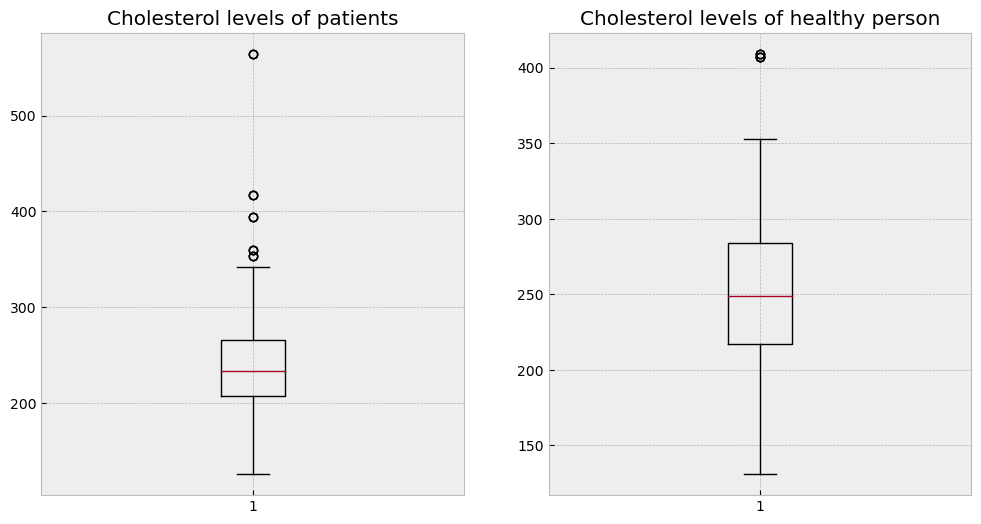

In [21]:
fig, axes = plt.subplots(nrows=1, ncols =2, figsize = (12, 6))
axes[0].boxplot(patients['chol'])
axes[0].set_title('Cholesterol levels of patients')


axes[1].boxplot(healthy['chol'])
axes[1].set_title('Cholesterol levels of healthy person')


The hypothesis testing is done to test if there are any difference between the mean blood pressure of patients aged above 55 and mean blood pressure of patients aged 55 and below. The null hypothesis is the mean between the two groups are the same and the alternative hypothesis is the mean has different values. The significance level for this test is 0.05.

In [26]:
pooled = np.hstack((patient_above, patient_below))
pooled

array([100, 112, 140, 106, 135, 138, 128, 160, 146, 150, 120, 146, 150,
       140, 124, 128, 128, 140, 150, 140, 150, 120, 140, 150, 180, 115,
       120, 120, 110, 130, 115, 160, 150, 102, 124, 170, 146, 110, 120,
       170, 140, 180, 120, 110, 160, 132, 110, 110, 140, 160, 120, 150,
       150, 140, 120, 140, 135, 140, 150, 155, 120, 110, 130, 105, 160,
       140, 130, 145, 146, 160, 145, 112, 156, 140, 124, 160, 128, 120,
       150, 102, 120, 150, 160, 115, 150, 150, 140, 130, 150, 150, 128,
       150, 135, 112, 125, 152, 124, 178, 160, 155, 140, 170, 140, 106,
       118, 130, 155, 140, 120, 140, 140, 120, 140, 110, 178, 140, 120,
       130, 128, 120, 130, 112, 150, 138, 100, 150, 140, 118, 105, 140,
       160, 110, 140, 120, 130, 150, 156, 152, 120, 120, 130, 125, 102,
       125, 160, 120, 160, 130, 150, 110, 130, 120, 120, 128, 145, 130,
       128, 105, 156, 135, 125, 118, 150, 120, 120, 150, 120, 120, 170,
       140, 138, 132, 110, 180, 178, 135, 120, 140, 120, 120, 15

In [29]:
num_sims = 10_000
count = 0
alpha = 0.05
patient_above= df.query('age >55 & target ==1')['trestbps']
patient_below= df.query('age <= 55 & target ==1')['trestbps']
len_above = len(patient_above)
len_below = len(patient_below)
pooled = np.hstack((patient_above, patient_below))
diff = np.abs(patient_above.mean() - patient_below.mean())
print('observed difference', diff)
for sim in range(num_sims):
    data1sample = npr.choice(pooled, len_above)
    data2sample = npr.choice(pooled, len_below)
    diff_sample = np.abs(data1sample.mean()- data2sample.mean())
    if diff_sample >= diff:
        count +=1
pval = count/num_sims
print(count)
if pval > alpha:
    print('cannot reject the null hypothesis')
else:
    print('reject the null hypothesis')
print("the p-value is", pval)

observed difference 8.79129711751662
0
reject the null hypothesis
the p-value is 0.0
